# **TUGAS VISUAL DATA WEEK 8**

# **WORDCLOUD**

**NAMA: Muhammad Zalfa Thoriq**

**NIM: 1301194473**

**KELAS: IF-42-GAB05**

In [136]:
#libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from os import path
from PIL import Image

import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [137]:
# dataframe
df = pd.read_excel("Laporan.xlsx")

In [138]:
# see 5 row head dataset
df.head()

,Supplier,Reference,Description_user,Tax Inclusive Amount,Grade,Bank Code,Code
0,XY Solutions,S77782,barang cepat estimasi seller responsif packagi...,5100.0,0,B1,BS-500
1,IS Communications,Invoice EXP22,bagus kirim cepat,179.0,1,B1,IS-380
2,Newscorp,I381119,barang sesuai pesan,478.0,1,B1,IS-375
3,EAG Brokers,Debit Order,panas pakai,340.0,1,B1,IS-340
4,Capital Bank,Bank Statement,barang sesuai minta bagus komunikasi jual beli...,50.0,0,B1,IS-315


In [139]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of Supplier in this dataset such as {}... \n".format(len(df.Supplier.unique()), ", ".join(df.Supplier.unique()[0:5])))

print("There are {} Akun in this dataset such as {}... \n".format(len(df.Reference.unique()), ", ".join(df.Reference.unique()[0:5])))

There are 199 observations and 7 features in this dataset. 

There are 23 types of Supplier in this dataset such as XY Solutions, IS Communications, Newscorp, EAG Brokers, Capital Bank... 

There are 39 Akun in this dataset such as S77782, Invoice EXP22, I381119, Debit Order, Bank Statement... 



In [140]:
df[["Supplier", "Reference"]].head()

,Supplier,Reference
0,XY Solutions,S77782
1,IS Communications,Invoice EXP22
2,Newscorp,I381119
3,EAG Brokers,Debit Order
4,Capital Bank,Bank Statement


In [141]:
# Groupby
Supplier = df.groupby("Supplier")

# Summary statistic 
Supplier.describe().head()

Tax Inclusive Amount                                      \
                                 count         mean           std      min   
Supplier                                                                     
ACC Institute                      1.0  2000.000000           NaN   2000.0   
Capital Bank                      24.0    56.250000     22.518109     35.0   
City Lodge                         1.0   563.000000           NaN    563.0   
EAG Brokers                       12.0   340.000000      0.000000    340.0   
Example (Pty) Ltd                 57.0  3736.842105  15013.909165 -20000.0   

                                                    Grade                      \
                      25%     50%      75%      max count      mean       std   
Supplier                                                                        
ACC Institute      2000.0  2000.0   2000.0   2000.0   1.0  1.000000       NaN   
Capital Bank         35.0    42.5     80.0     80.0  24.0  0.958333  0.204124   
City Lodge          563.0   563.0    563.0    563.0   1.0  1.000000       NaN   
EAG Brokers         340.0   340.0    340.0    340.0  12.0  1.000000  0.000000   
Example (Pty) Ltd  -170.0   100.0  20000.0  20000.0  57.0  0.912281  0.285401   

                                            
                   min  25%  50%  75%  max  
Supplier                                    
ACC Institute      1.0  1.0  1.0  1.0  1.0  
Capital Bank       0.0  1.0  1.0  1.0  1.0  
City Lodge         1.0  1.0  1.0  1.0  1.0  
EAG Brokers        1.0  1.0  1.0  1.0  1.0  
Example (Pty) Ltd  0.0  1.0  1.0  1.0  1.0

In [142]:
Reference = df.groupby("Reference")

Reference.describe().head()

Tax Inclusive Amount                                          \
                              count         mean          std    min    25%   
Reference                                                                     
Bank Statement                 46.0    29.347826    91.114145 -200.0   35.0   
Cash                           11.0    97.272727    45.941465   29.0   82.5   
Debit Order                    45.0  1733.333333  2685.777355  100.0  220.0   
I381119                         1.0   478.000000          NaN  478.0  478.0   
IN1179                          1.0    41.000000          NaN   41.0   41.0   

                                     Grade                                     \
                  50%    75%     max count      mean       std  min  25%  50%   
Reference                                                                       
Bank Statement   42.5   80.0   200.0  46.0  0.934783  0.249637  0.0  1.0  1.0   
Cash             90.0  103.5   218.0  11.0  1.000000  0.000000  1.0  1.0  1.0   
Debit Order     340.0  340.0  6400.0  45.0  0.933333  0.252262  0.0  1.0  1.0   
I381119         478.0  478.0   478.0   1.0  1.000000       NaN  1.0  1.0  1.0   
IN1179           41.0   41.0    41.0   1.0  1.000000       NaN  1.0  1.0  1.0   

                          
                75%  max  
Reference                 
Bank Statement  1.0  1.0  
Cash            1.0  1.0  
Debit Order     1.0  1.0  
I381119         1.0  1.0  
IN1179          1.0  1.0

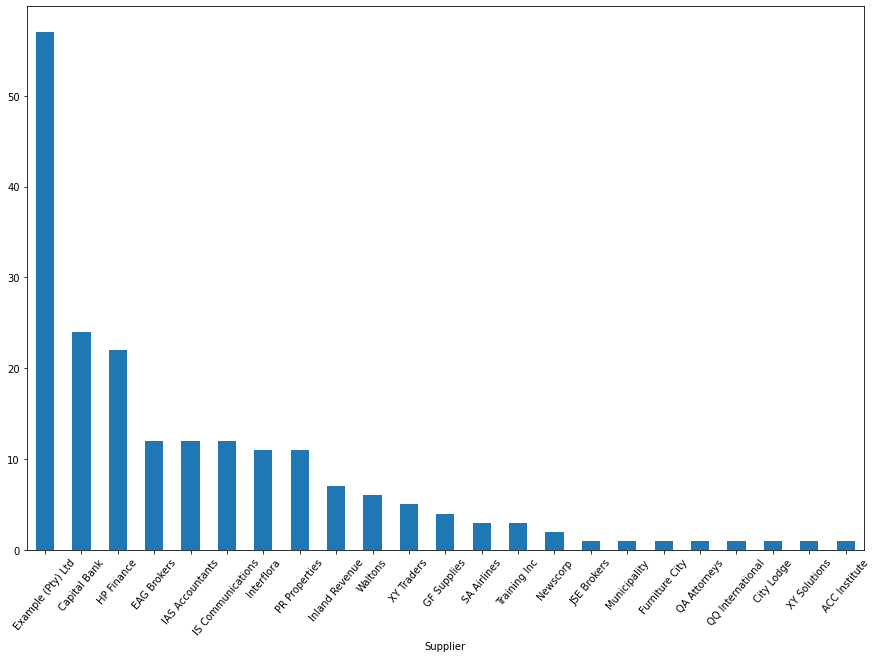

In [143]:
plt.figure(figsize=(15,10))
Supplier.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Supplier")
plt.show()

In [144]:
# Max
Reference.max

<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f9286c98a10>>

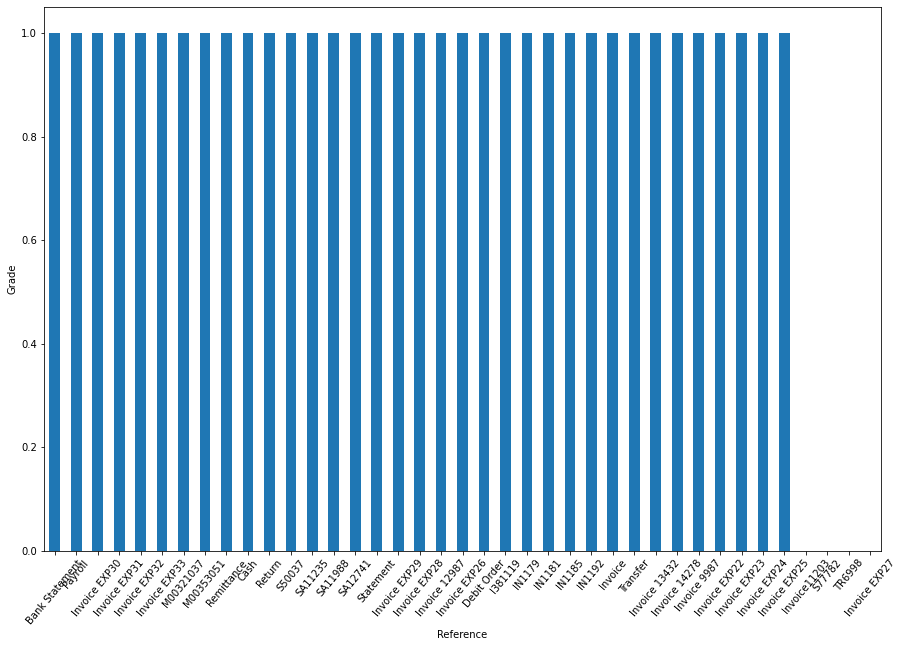

In [145]:
plt.figure(figsize=(15,10))
Reference.max(numeric_only=True, min_count=-1).sort_values(by="Grade",ascending=False)["Grade"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Reference")
plt.ylabel("Grade")
plt.show()

In [146]:
!pip install WordCloud

barang cepat estimasi seller responsif packaging oke barang lengkap utuh terima kasih


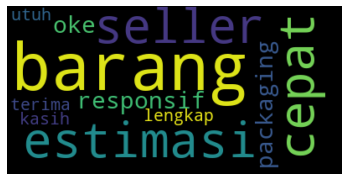

In [147]:
# Start with one review:
text = df.Description_user[0]
print(text)

# Create a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

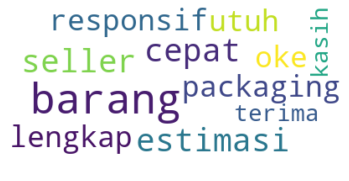

In [148]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

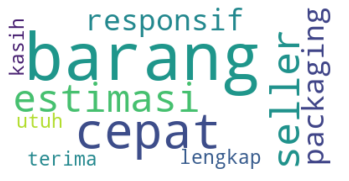

In [149]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["oke"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# Matplotlib :
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [150]:
Image = np.array(Image.open("uang.jpg"))
Image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]]

In [151]:
Image.shape

(474, 474, 3)

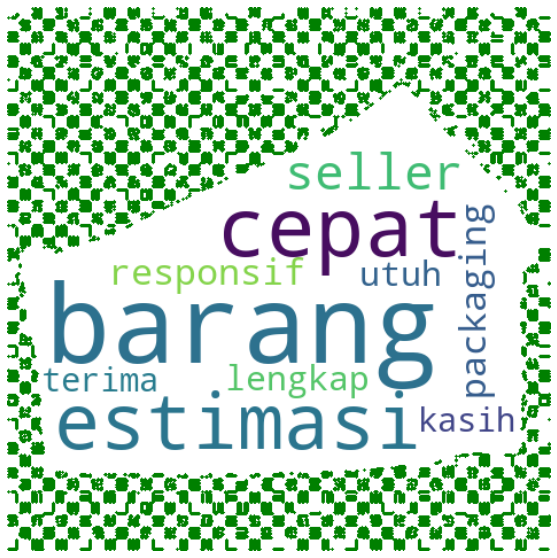

In [152]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=Image,
               stopwords=stopwords, contour_width=3, contour_color='green')

# Generate a wordcloud
wc.generate(text)

# Save file
wc.to_file("uang.jpg")

# show Image
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()